# 6.5: Unsupervised Machine Learning: Clustering - Task

### This script contains the following:

#### 1. Importing libraries and data and removing non-numeric columns
#### 2. The elbow technique
#### 3. k-means clustering

## Step 1

### Importing libraries and data and removing non-numeric columns

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use standardscaler module.
from sklearn.preprocessing import StandardScaler
#Sk learn is one of the most widely used libraries. We'll use the k means and pca modules.
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Step 2

In [9]:


path=r'C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Data Immersion\Achievement 6\Python-NewYorkCityAirbnb\02 Data\Prepared Data'



In [10]:
df=pd.read_csv(os.path.join(path,'6.3','NewYorkCityAirbnb_Clean.csv'),index_col=0)

In [11]:
df.shape

(48895, 13)

In [12]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_category,available_category
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Cheapest price,Very Long term
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Cheapest price,Very Long term
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Cheapest price,Very Long term
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Cheapest price,Long term
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheapest price,Short term


### Step 2.a.

In [15]:
# drop non-numeric columns from the dataset to perform K-means algorithm

df=df.drop(columns=['host_id','neighbourhood_group','neighbourhood','room_type','price_category','available_category'])

In [16]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,6,365
1,40.75362,-73.98377,225,1,45,2,355
2,40.80902,-73.94190,150,3,0,1,365
3,40.68514,-73.95976,89,1,270,1,194
4,40.79851,-73.94399,80,10,9,1,0


In [18]:
df.shape

(48895, 7)

Text(0.5, 1.0, 'Visualization of raw data')

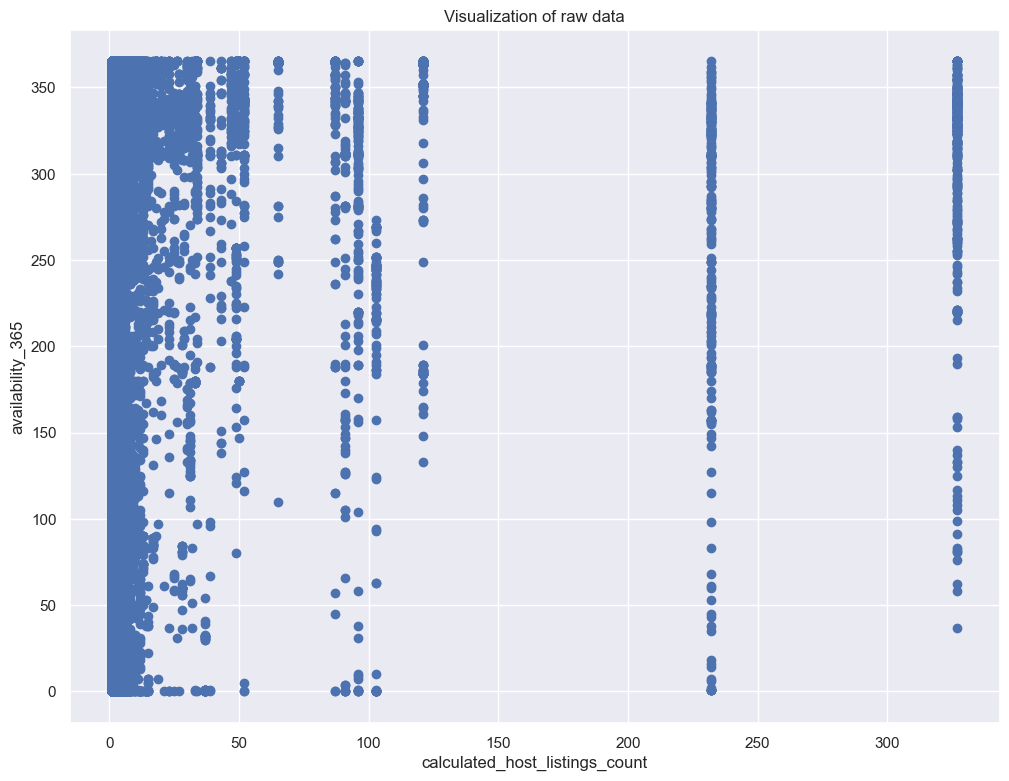

In [22]:
# We'll plot the data. We create a 12 by 9 inches figure
# We have 48895 data points, which we'll scatter accross calculated_host_listings_count and availability_365, located on positions 5,6 in our dataset
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,5],df.iloc[:,6])
plt.xlabel('calculated_host_listings_count')
plt.ylabel('availability_365')
plt.title('Visualization of raw data')

### Step 2.b.

### Standardization of data

In [24]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df)

### Perform Dimensionality Reduction with PCA.  

### For that first, we must fit our standardized data using PCA.

### PCA

In [25]:
pca=PCA()
pca.fit(segmentation_std)

PCA()

### Second, we need to decide how many features we’d like to keep based on the cumulative variance plot.

In [28]:
### The attribute shows how much variance is explained by each of the seven individual components
pca.explained_variance_ratio_

array([0.19905465, 0.17599826, 0.15146563, 0.14181707, 0.12452566,
       0.11995936, 0.08717938])

Text(0.5, 1.0, 'Explained  variance by components')

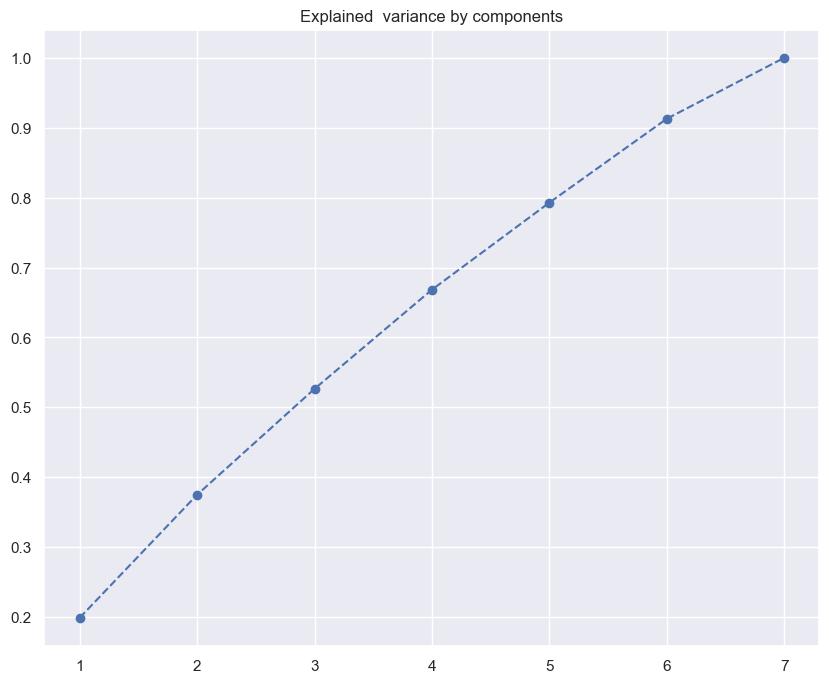

In [38]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained  variance by components')
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). 
### A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 6 components.

### As a third step, we perform PCA with the chosen number of components.

### For our data set, that means 6 principal components:

In [43]:
# We choose 6 components according to the previous graph
pca=PCA(n_components=6)

In [44]:
# Fit the model to our data with the selected number of components. In our case six.
pca.fit(segmentation_std)

PCA(n_components=6)

### We need only the calculated resulting components scores for the elements in our data set:

In [45]:
pca.transform(segmentation_std)

array([[ 0.88711601,  0.51440335, -1.43108366, -0.6410946 , -0.03396066,
         0.9512741 ],
       [ 0.93373207,  0.91331312, -0.45366383,  0.83378723, -0.11003651,
        -0.19974757],
       [ 0.72381131,  1.01138857,  1.15232764,  0.67178322, -0.26203267,
         0.26273309],
       ...,
       [-0.36573959, -0.45175828,  1.54405772,  0.46597973, -0.09175218,
        -0.55473695],
       [-0.41870706, -1.06594836,  0.33484416,  0.00158236, -0.48391031,
        -0.71735772],
       [-0.25025747, -0.99155692,  0.47415206,  0.09004919, -0.16107134,
        -0.71484365]])

In [46]:
scores_pca=pca.transform(segmentation_std)

### We’ll incorporate the newly obtained PCA scores in the K-means algorithm. 
### That's how we can perform segmentation based on principal components scores instead of the original features.

## Combine PCA and K-means Clustering

### In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm.

### First, however, we must decide how many clustering solutions we’d test.
### There is no general ruling on this issue. It really depends on the data. 
### In our case, we test an algorithm with up to 20 clusters.

### K-Means clustering with PCA

In [48]:
# We fit K-Means using the transformed data from the PCA
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

### The next step involves plotting the WCSS against the number of components on a graph.

Text(0.5, 1.0, 'K-means with PCA Clustering')

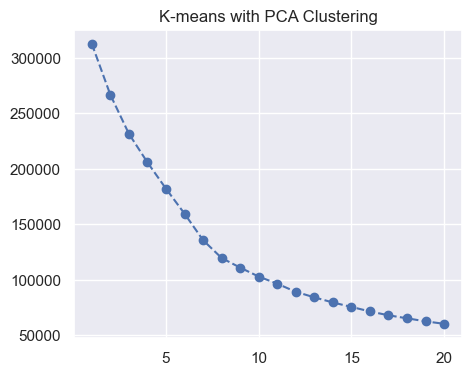

In [56]:
plt.figure(figsize=(5,4))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.title('K-means with PCA Clustering')

#### And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. 
#### The approach consists of looking for a kink or elbow in the WCSS graph.
#### Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. 
#### In this instance, the kink comes at the 7 clusters mark. So, we’ll be keeping a seven-cluster solution.

### All left to do is to implement it.

In [99]:
# We have chosen 7 clusters, so we run K-Means with number of clusters equal 7
# Same initializer and random state as before
kmeans_pca=KMeans(n_clusters=7, init='k-means++',random_state=42)

In [100]:
# We fit our data with the K-Means PCA model
kmeans_pca.fit(scores_pca)

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

### Here, we use the same initializer and random state as before. 
### Subsequently, we fit the model with the principal component scores.
### And now we’ve come to the most interesting part: analyzing the results of our algorithm.

##  Analyze the Results of PCA and K-Means Clustering

#### Before all else, we’ll create a new data frame. It allows us to add in the values of the separate components 
#### to our segmentation data set. The components’ scores are stored in the ‘scores P C A’ variable. 
#### Let’s label them Component 1, 2, 3, 4, 5 and 6. In addition, we also append the ‘K means P C A’ labels to the new data frame.

## K-Means clustering with PCA Results

In [101]:
# We create a new dataframe with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-6:]=['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-Means PCA']=kmeans_pca.labels_

In [102]:
df_segm_pca_kmeans.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-Means PCA
0,40.64749,-73.97237,149,1,9,6,365,0.887116,0.514403,-1.431084,-0.641095,-0.033961,0.951274,6
1,40.75362,-73.98377,225,1,45,2,355,0.933732,0.913313,-0.453664,0.833787,-0.110037,-0.199748,6
2,40.80902,-73.94190,150,3,0,1,365,0.723811,1.011389,1.152328,0.671783,-0.262033,0.262733,1
3,40.68514,-73.95976,89,1,270,1,194,-0.434937,3.486315,-3.151160,1.285529,0.496565,-2.327699,2
4,40.79851,-73.94399,80,10,9,1,0,-0.566165,-0.385690,1.313533,0.263411,-0.054049,-0.585433,1


### One small step remains: we should add the names of the segments to the labels.

### We create a new column named ‘Segment’ and map the seven clusters directly inside it.

In [103]:
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3:'fourth',
                                                                             4:'fifth',
                                                                             5:'sixth',
                                                                             6:'seventh'
    
})

## Visualize Clusters by Components

#### Let’s finish off by visualizing our clusters on a 2D plane. 
#### It's a 2D visualization, so we need to choose two components and use them as axes. 
#### The point of PCA was to determine the most important components. 
#### This way, we can be absolutely sure that the first two components explain more variance than the third one.

### let’s visualize the segments with respect to the first two components.

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Clusters by PCA Components')

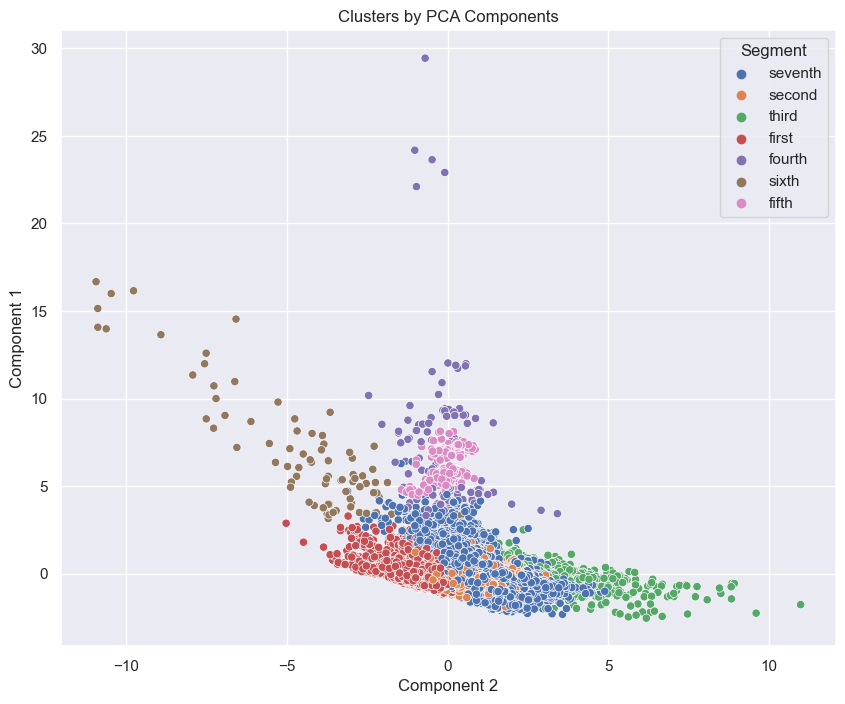

In [109]:
# Plot data by PCA components. The Y axis is the first component and X axis the second.
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')

In [111]:
# Export df_segm_pca_kmeans dataframe to the prepare data folder 

df_segm_pca_kmeans.to_csv(os.path.join(path,'6.5','NewYorkCityAirbnb_Clean_PCA_KMeans.csv'),index=False)